In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_2_wks.csv'
experiment_data = pd.read_csv(PATH)

In [16]:
experiment_data.head(3)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN


In [80]:
# How large is each group?
groups = experiment_data.groupby(['test'])
print(groups.size())

# What is the signup rate of test and control?
print(experiment_data[experiment_data['test'] == 1].is_signed_up.mean())
print(experiment_data[experiment_data['test'] == 0].is_signed_up.mean())


# Is the experiment already significant?
stats.ttest_ind(experiment_data[experiment_data['test'] == 1].is_signed_up, experiment_data[experiment_data['test'] == 0].is_signed_up)

test
0    30241
1     3372
dtype: int64
0.13701067615658363
0.14708508316523924


Ttest_indResult(statistic=-1.5711354292574262, pvalue=0.11616060761145311)

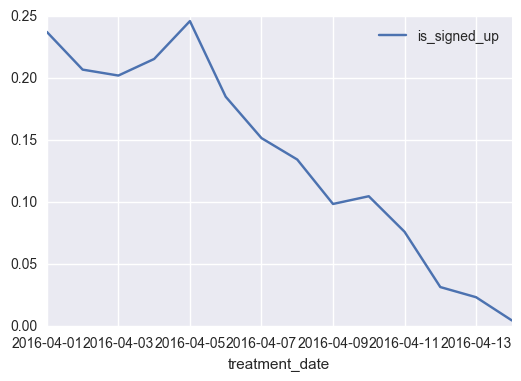

In [91]:
# Let's see what might be wrong.

experiment_data[experiment_data.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()